In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
# Define LeNet-5 Architecture
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),
    layers.AveragePooling2D(),
    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50


1500/1500 [==============================] - 7s 4ms/step - loss: 0.2529 - accuracy: 0.9244 - val_loss: 0.1417 - val_accuracy: 0.9568
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0955 - accuracy: 0.9706 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0669 - val_accuracy: 0.9794
Epoch 4/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0689 - val_accuracy: 0.9798
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0651 - val_accuracy: 0.9822
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0633 - val_accuracy: 0.9818
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0250 - accuracy: 0.9916 - val_loss: 0.0611 - val_accurac

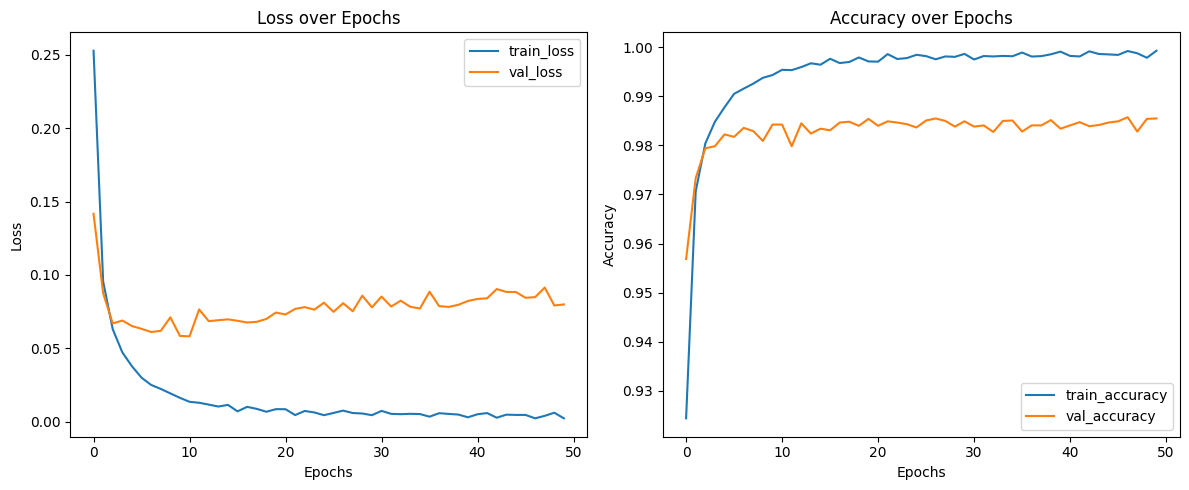

In [6]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9869
Test accuracy: 0.9869
